In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Read dataset
file_path = "E:/Uni/Thesis/Material/Dataset/archive/world_development_data_imputed.csv"
data = pd.read_csv(file_path, sep=',')
data.head()

,Year,Country,Region,SubRegion,SurfAreaSqKm,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
0,2000.0,Afghanistan,Asia,Southern Asia,652860.0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,...,1.778669e+10,41.312634,17.178775,37.611028,55.298000,52.777048,0.000000,129.3,-1007135.0,1.861377
1,2000.0,Malta,Europe,Southern Europe,320.0,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,...,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299
2,2000.0,Belgium,Europe,Western Europe,30530.0,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,...,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431
3,2000.0,Marshall Islands,Oceania,Micronesia,180.0,54224.0,301.244444,0.721838,1.153475e+08,1.354079,...,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0,1.492787
4,2000.0,Mauritania,Africa,Sub-Saharan Africa,1030700.0,2695003.0,2.614731,2.799182,1.779521e+09,-3.918026,...,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0,2.476860


In [5]:
# Preprocess data
data_europe = data[data['Region'] == 'Europe']
data_europe = data_europe.drop(columns=['Year', 'SurfAreaSqKm'])
data_europe = data_europe.select_dtypes(include=[np.number])
data_europe.head()

,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,FertRate,FDINetBoP,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
1,390087.0,1219.021875,0.645267,4.323339e+09,19.681791,19.869,1.871997,120.247484,1.680,7.431853e+08,...,4.273280e+09,128.374581,26.939987,-4.512396,78.348780,135.682159,28.667475,7.6,1799.0,0.952299
2,10251250.0,338.548547,0.242518,2.367925e+11,3.716679,11.915,1.176005,72.547395,1.670,8.873871e+10,...,2.654129e+11,69.682740,24.943833,2.014617,77.721951,154.515900,54.840339,5.9,32262.0,0.308431
9,9979610.0,49.197478,-0.471131,1.273686e+10,5.800003,26.695,12.096827,69.210821,1.317,1.188000e+08,...,1.376610e+10,72.398345,33.478946,185.290761,68.912195,125.399855,0.481188,12.8,-10419.0,0.233050
11,604950.0,381.082941,-0.027974,9.842930e+08,3.100000,22.647,11.301878,36.814992,2.065,3.834577e+09,...,9.358346e+08,51.110210,21.259005,3.823115,73.818488,87.420330,90.241838,14.2,-4423.0,1.594405
17,2924668.0,101.844482,-0.203372,1.288429e+09,2.107716,43.252,25.409322,49.600114,1.499,1.275400e+08,...,1.421447e+09,76.562986,19.147669,27.328752,66.417000,96.939732,3.269378,31.5,-44421.0,-1.103104


In [6]:
data_americas = data[data['Region'] == 'Americas']
data_americas = data_americas.drop(columns=['Year', 'SurfAreaSqKm'])
data_americas = data_americas.select_dtypes(include=[np.number])
data_americas.head()

,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,FertRate,FDINetBoP,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
6,97873442.0,50.347716,1.584551,7.079099e+11,4.942454,73.673,3.323086,25.406717,2.7160,1.838228e+10,...,6.142435e+11,27.025965,34.209706,11.152206,73.569,48.852406,14.383759,28.300000,-356430.0,1.961320
14,264657.0,615.481395,0.184181,3.059500e+09,4.447190,53.139,1.995424,43.235823,1.7750,7.369694e+07,...,2.926247e+09,47.342703,15.306423,-1.322839,74.089,46.674293,10.756186,15.200000,-833.0,-0.771096
20,240406.0,10.539500,3.243729,1.116000e+09,13.005780,99.894,10.854144,43.727599,3.6340,2.956465e+07,...,1.057987e+09,54.793907,22.017921,1.288216,68.564,64.516129,6.993170,23.600000,1678.0,2.840023
25,61833.0,1145.055556,0.890209,3.480219e+09,9.317156,33.190,0.668952,79.738097,1.7400,6.690000e+07,...,3.300565e+09,69.745976,11.073010,-4.236356,78.858,22.153778,21.182643,27.259193,-67.0,0.890209
43,3810605.0,429.605975,0.276559,6.170180e+10,3.271965,74.114,0.660110,62.341293,2.0485,-3.892719e+07,...,4.019142e+10,43.828219,46.061865,3.295072,75.977,38.542839,34.441124,39.164939,-22489.0,0.370914


In [7]:
data_africa = data[data['Region'] == 'Africa']
data_africa = data_africa.drop(columns=['Year', 'SurfAreaSqKm'])
data_africa = data_africa.select_dtypes(include=[np.number])
data_africa.head()                                               

,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,FertRate,FDINetBoP,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
4,2695003.0,2.614731,2.799182,1.779521e+09,-3.918026,92.364,24.828745,25.517116,5.459,4.009600e+07,...,1.907497e+09,33.423259,29.951850,6.351587,61.028000,45.461676,0.567717,98.8,-2997.0,2.476860
5,1186873.0,584.666502,0.982676,4.663321e+09,8.202792,38.898,5.705010,61.094215,1.990,2.656412e+08,...,4.631888e+09,61.218388,25.985491,3.409929,71.663415,78.270400,14.803484,18.8,-2522.0,0.694891
8,11239101.0,9.210943,2.907829,2.961485e+09,-0.060835,182.216,32.901868,22.478590,6.874,6.033162e+07,...,3.106500e+09,32.943985,21.520948,-0.619728,50.539000,45.619006,0.092516,187.7,-17423.0,5.443570
12,28554415.0,63.980316,1.330563,4.301746e+10,2.582181,35.495,10.728632,24.196828,2.796,4.265533e+08,...,4.523877e+10,29.243478,24.352630,-1.767599,66.787000,44.089079,8.133730,52.4,-90376.0,1.947440
13,17768505.0,22.595317,2.453306,5.656474e+09,1.180301,168.573,19.095205,11.196198,5.812,1.393000e+08,...,5.660248e+09,34.907017,17.902358,11.497545,49.491000,26.907223,0.287391,170.7,-58468.0,3.066911


In [8]:
data_asia = data[data['Region'] == 'Asia']
data_asia = data_asia.drop(columns=['Year', 'SurfAreaSqKm'])
data_asia = data_asia.select_dtypes(include=[np.number])
data_asia.head() 

,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,FertRate,FDINetBoP,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
0,19542982.0,29.963329,1.443803,1.801248e+10,-5.206288,152.572,33.096776,13.315247,7.534,1.700000e+05,...,1.778669e+10,41.312634,17.178775,37.611028,55.298,52.777048,0.000000,129.3,-1007135.0,1.861377
10,2450979.0,1.583894,0.921870,1.136896e+09,1.146062,27.173,27.422531,53.996751,2.255,5.369700e+07,...,1.115886e+09,67.889858,22.196142,11.999691,62.882,101.240560,6.307681,63.6,-10833.0,1.818526
15,45538332.0,69.679487,1.096713,6.849322e+09,12.418192,39.351,0.629898,65.686369,2.785,2.547898e+08,...,6.113176e+09,58.515040,19.053039,11.026531,60.155,58.268544,0.029419,89.3,-106816.0,1.772442
19,282507.0,941.690000,1.568301,6.243371e+08,3.845810,31.100,0.511755,61.741034,2.710,2.231245e+07,...,5.790460e+08,89.764943,15.731442,2.032412,70.876,79.764596,2.703650,39.1,133.0,3.653469
21,5430853.0,23.530559,1.686007,1.731198e+09,5.798782,100.814,33.630251,30.662004,4.400,3.389000e+07,...,1.496698e+09,38.175298,16.477069,24.797777,58.378,49.965399,0.233499,107.3,-34009.0,6.276325


In [9]:
data_oceania = data[data['Region'] == 'Oceania']
data_oceania = data_oceania.drop(columns=['Year', 'SurfAreaSqKm'])
data_oceania = data_oceania.select_dtypes(include=[np.number])
data_oceania.head() 

,PopTotal,PopDens,PopGrowth%,GDP,GDPGrowth%,AdolFertRate,AgriValAdd%GDP,Exports%GDP,FertRate,FDINetBoP,...,GNIAtlas,Imports%GDP,IndValAdd%GDP,InflConsPric%,LifeExpBirth,MerchTrade%GDP,MobileSubs/100,MortRateU5,NetMigr,UrbanPopGrowth%
3,54224.0,301.244444,0.721838,1.153475e+08,1.354079,99.344,8.014391,28.696331,4.592,7.390000e+05,...,1.500075e+08,100.812761,12.681072,-0.454689,63.275000,55.484514,0.824358,42.1,-1323.0,1.492787
7,111709.0,159.584286,0.152297,2.332718e+08,4.833904,65.191,24.075049,17.971096,4.279,3.036791e+09,...,2.374735e+08,72.617736,8.182515,1.078906,69.769000,55.300298,0.000000,38.5,-2688.0,-1.705163
18,10377.0,518.850000,-0.057803,6.765300e+07,-3.583406,80.154,23.510799,67.597804,3.642,1.335278e+06,...,7.150886e+07,63.901870,9.778335,5.277734,58.732000,66.353886,11.565150,42.6,-223.0,-0.057803
47,19028802.0,2.476967,1.144473,4.158450e+11,3.901171,17.357,3.112843,19.405280,1.756,1.489298e+10,...,4.050021e+11,21.561707,24.573819,2.560384,79.234146,32.559970,45.020594,6.2,109375.0,0.984334
50,184008.0,65.020495,0.981388,2.588561e+08,5.093045,43.989,15.076355,61.633928,4.514,-1.206806e+06,...,2.759106e+08,89.720228,27.726504,2.074899,70.746000,66.059859,1.358637,21.3,-3020.0,1.394480


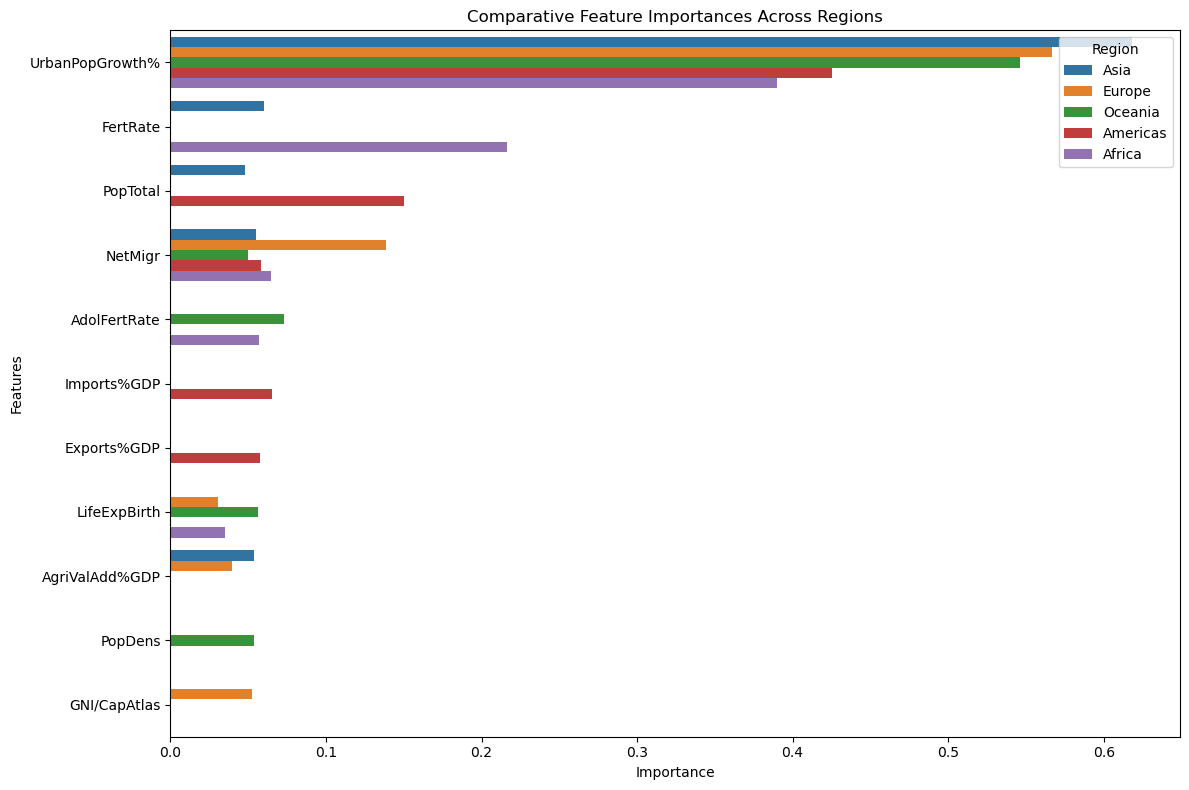

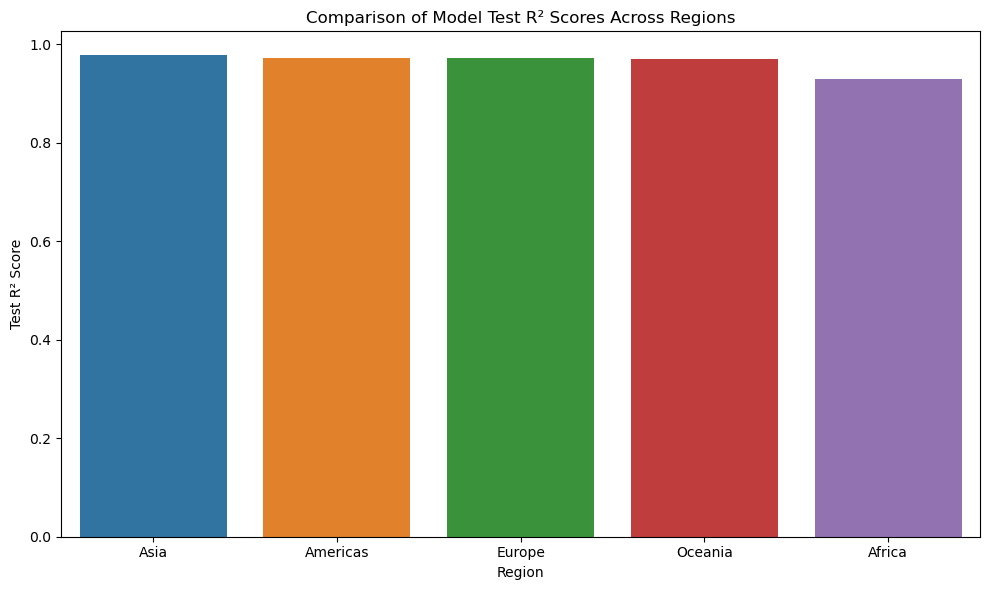

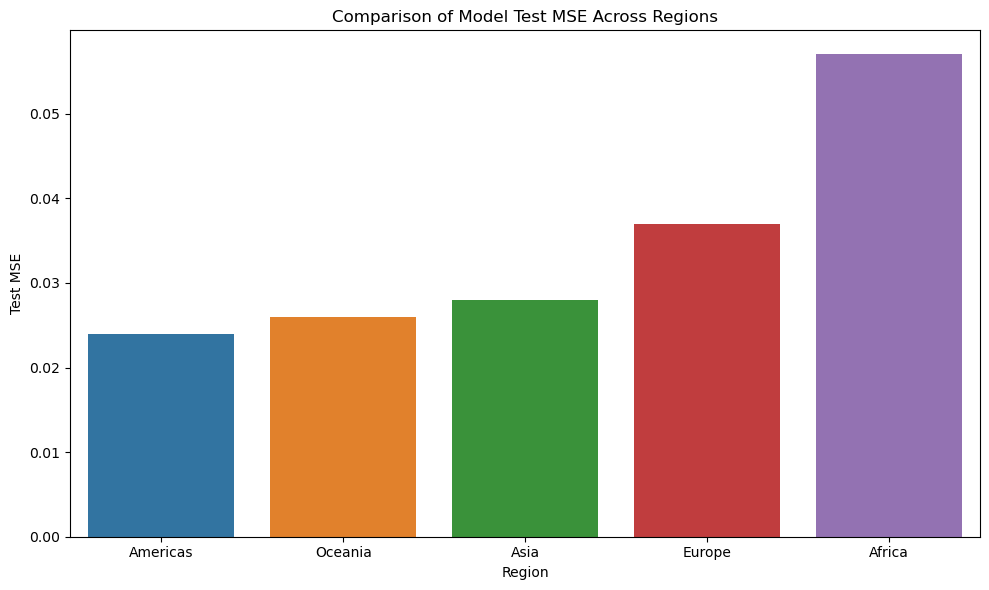

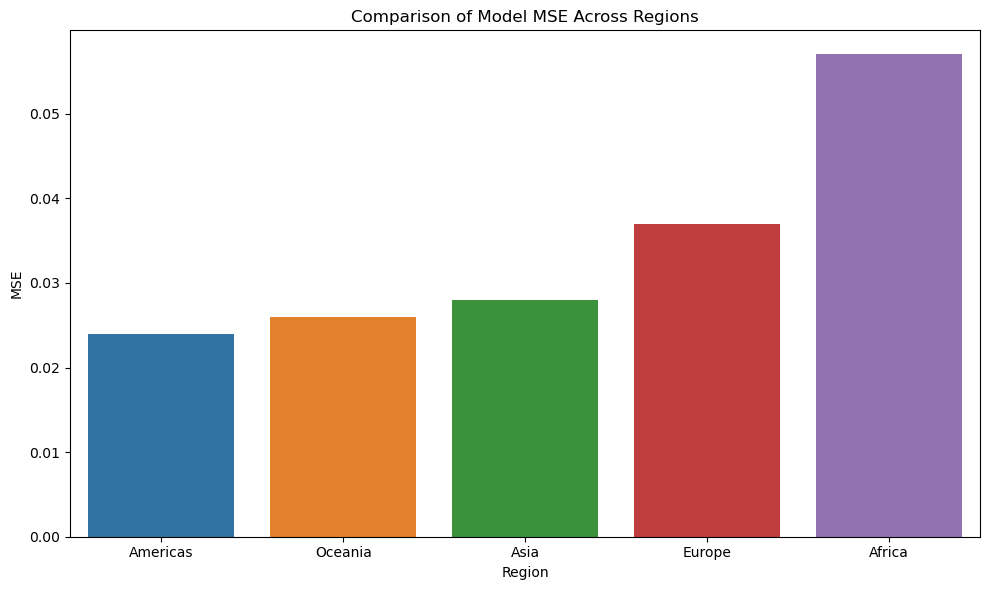

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: create DataFrames for each region
data_europe = {
    'Feature': ['UrbanPopGrowth%', 'NetMigr', 'GNI/CapAtlas', 'AgriValAdd%GDP', 'LifeExpBirth'],
    'Importance': [0.566576, 0.138752, 0.052663, 0.039297, 0.030605],
    'Region': 'Europe'
}
data_americas = {
    'Feature': ['UrbanPopGrowth%', 'PopTotal', 'Imports%GDP', 'NetMigr', 'Exports%GDP'],
    'Importance': [0.425561, 0.150147, 0.065428, 0.057962, 0.057606],
    'Region': 'Americas'
}
data_africa = {
    'Feature': ['UrbanPopGrowth%', 'FertRate', 'NetMigr', 'AdolFertRate', 'LifeExpBirth'],
    'Importance': [0.389659, 0.216582, 0.064902, 0.056965, 0.034985],
    'Region': 'Africa'
}
data_asia = {
    'Feature': ['UrbanPopGrowth%', 'FertRate', 'NetMigr', 'AgriValAdd%GDP', 'PopTotal'],
    'Importance': [0.618129, 0.060309, 0.055245, 0.053748, 0.047696],
    'Region': 'Asia'
}
data_oceania = {
    'Feature': ['UrbanPopGrowth%', 'AdolFertRate', 'LifeExpBirth', 'PopDens', 'NetMigr'],
    'Importance': [0.546344, 0.072992, 0.056576, 0.053615, 0.049848],
    'Region': 'Oceania'
}

# Combine into one DataFrame using pd.concat
df_europe = pd.DataFrame(data_europe)
df_americas = pd.DataFrame(data_americas)
df_africa = pd.DataFrame(data_africa)
df_asia = pd.DataFrame(data_asia)
df_oceania = pd.DataFrame(data_oceania)

df = pd.concat([df_europe, df_americas, df_africa, df_asia, df_oceania], ignore_index=True)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Region', data=df.sort_values('Importance', ascending=False))
plt.title('Comparative Feature Importances Across Regions')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.legend(title='Region')
plt.tight_layout()
plt.savefig("Comparative_Feature_Importances_Across_Regions.png")
plt.show()

# Updated model performance data based on test set evaluations
model_performance = {
    'Region': ['Europe', 'Americas', 'Africa', 'Asia', 'Oceania'],
    'Test MSE': [0.037, 0.024, 0.057, 0.028, 0.026],  # Updated values
    'Test R2 Score': [0.971, 0.972, 0.930, 0.977, 0.969]  # Updated values
}

df_perf = pd.DataFrame(model_performance)

# R2 Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Test R2 Score', data=df_perf.sort_values('Test R2 Score', ascending=False))
plt.title('Comparison of Model Test R² Scores Across Regions')
plt.xlabel('Region')
plt.ylabel('Test R² Score')
plt.tight_layout()
plt.savefig("Comparison_Test_R²_Scores_Regions.png")
plt.show()

# Test MSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Test MSE', data=df_perf.sort_values('Test MSE'))
plt.title('Comparison of Model Test MSE Across Regions')
plt.xlabel('Region')
plt.ylabel('Test MSE')
plt.tight_layout()
plt.savefig("Comparison_Test_MSE_Regions.png")
plt.show()


# MSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Test MSE', data=df_perf.sort_values('Test MSE'))
plt.title('Comparison of Model MSE Across Regions')
plt.xlabel('Region')
plt.ylabel('MSE')
plt.tight_layout()
plt.savefig("Comparison_MSE_Regions.png")
plt.show()


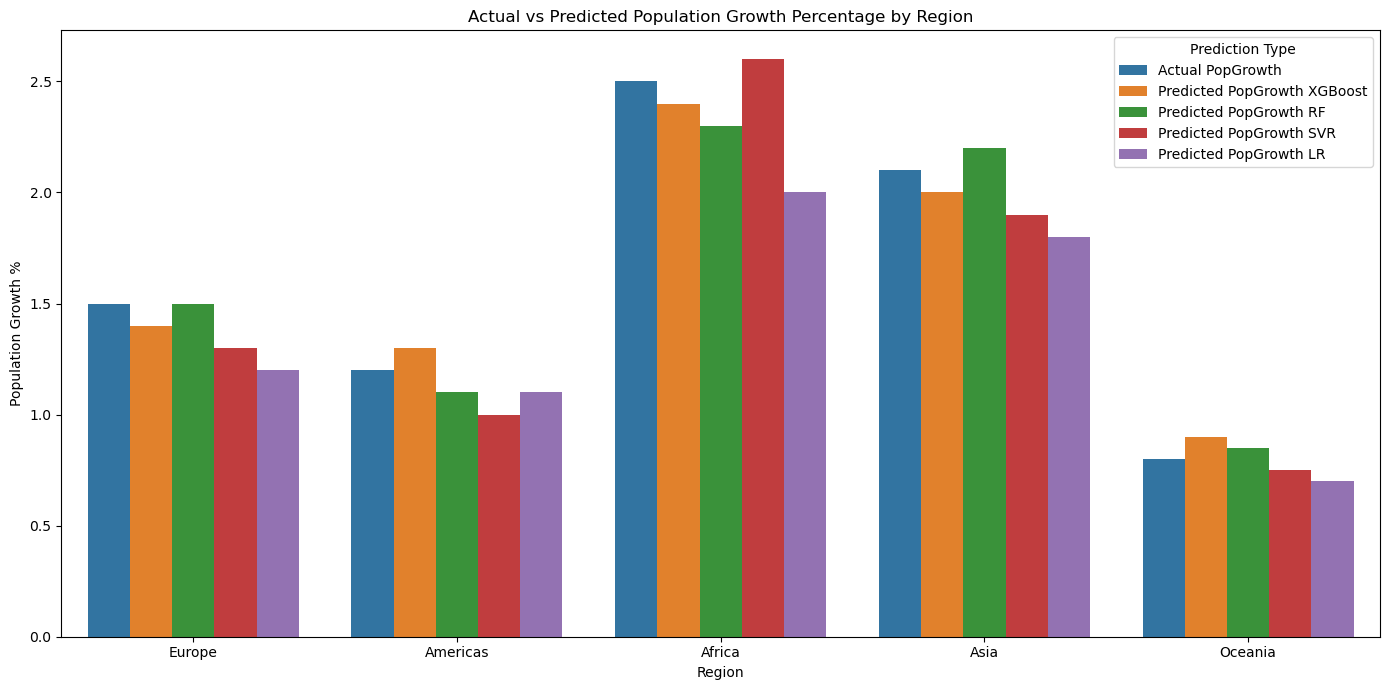

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data: you should replace this with your actual data
data = {
    'Region': ['Europe', 'Americas', 'Africa', 'Asia', 'Oceania'],
    'Actual PopGrowth': [1.5, 1.2, 2.5, 2.1, 0.8],
    'Predicted PopGrowth XGBoost': [1.4, 1.3, 2.4, 2.0, 0.9],
    'Predicted PopGrowth RF': [1.5, 1.1, 2.3, 2.2, 0.85],
    'Predicted PopGrowth SVR': [1.3, 1.0, 2.6, 1.9, 0.75],
    'Predicted PopGrowth LR': [1.2, 1.1, 2.0, 1.8, 0.7]
}

df = pd.DataFrame(data)

# Melting the DataFrame
df_melted = df.melt(id_vars=['Region'], var_name='Type', value_name='Growth %')

# Plotting the Actual vs Predicted Population Growth
plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Growth %', hue='Type', data=df_melted)
plt.title('Actual vs Predicted Population Growth Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Population Growth %')
plt.legend(title='Prediction Type')
plt.tight_layout()
plt.savefig("Act_vs_Pred_Regions.png")
plt.show()